In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import csv
import os
import math
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
sns.set()

In [2]:
traindf = pd.read_pickle("./pickles/df_small_train.pkl")
testdf = pd.read_pickle("./pickles/df_small_test.pkl")

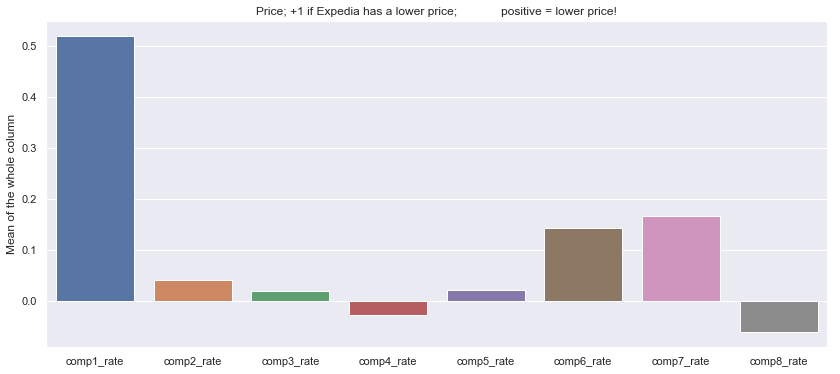

In [3]:
# Analyse comp_rate_diff --> difference in price for Expedia competitor
df = traindf
compare_cols = ["comp1_rate", "comp2_rate", "comp3_rate", "comp4_rate", "comp5_rate",
                "comp6_rate", "comp7_rate", "comp8_rate"]

total_diff = []
[total_diff.append(np.mean(df[col])) for col in compare_cols]

def showcompareplot(compare_cols, total_diff, title):
    fig, ax = plt.subplots(figsize=(14,6))
    ax.set(ylabel='Mean of the whole column', title=title)
    sns.barplot(compare_cols, total_diff)

showcompareplot(compare_cols, total_diff, title="Price; +1 if Expedia has a lower price; \
            positive = lower price!")

## On average, Expedia has a lower price than competitor 1 for the hotel. For competitor 4, Expedia has a higher price (on average!). However, when we look at availability we see that for competitor 4, the availability is slightly higher than other competitors. On the other hand, this is only about 10%.

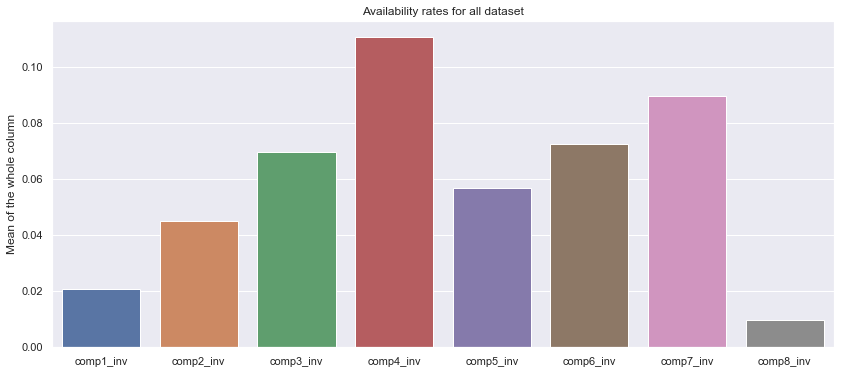

In [4]:
compare_cols_inv = ["comp1_inv", "comp2_inv", "comp3_inv", "comp4_inv", "comp5_inv",
                "comp6_inv", "comp7_inv", "comp8_inv"]

total_diff = []
[total_diff.append(np.mean(df[col])) for col in compare_cols_inv]
    
showcompareplot(compare_cols_inv, total_diff, "Availability rates for all dataset")

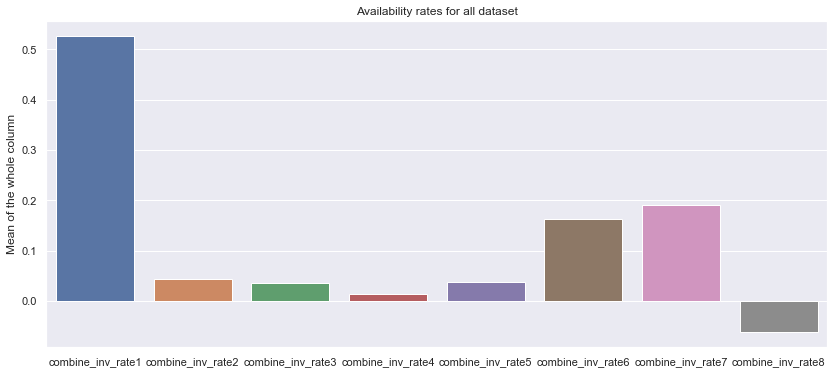

In [5]:
# Add comp_inv and comp_rate together 

for i in range (len(compare_cols)):
    df["combine_inv_rate" + str(i + 1)] = df[compare_cols_inv[i]] + df[compare_cols[i]]

compare_cols_total = ["combine_inv_rate1", "combine_inv_rate2", "combine_inv_rate3", "combine_inv_rate4",
                      "combine_inv_rate5", "combine_inv_rate6", "combine_inv_rate7", "combine_inv_rate8"]
total_diff = []
[total_diff.append(np.mean(df[col])) for col in compare_cols_total]
    
showcompareplot(compare_cols_total, total_diff, "Availability rates for all dataset")

In [6]:
traindf.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,gross_bookings_usd,booking_bool,combine_inv_rate1,combine_inv_rate2,combine_inv_rate3,combine_inv_rate4,combine_inv_rate5,combine_inv_rate6,combine_inv_rate7,combine_inv_rate8
1196703,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,2990,3,4.5,...,NaN,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0
1196704,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,4256,4,4.5,...,322.31,1,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
1196705,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,6427,4,4.0,...,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
1196706,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,8289,4,4.5,...,NaN,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0
1196707,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,13668,4,4.0,...,NaN,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0
1196708,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,17105,4,4.0,...,NaN,0,NaN,0.0,0.0,NaN,1.0,NaN,NaN,0.0
1196709,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,19743,4,4.0,...,NaN,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0
1196710,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,21688,3,4.0,...,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1196711,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,28818,3,4.5,...,NaN,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0
1196712,79994,2013-01-03 13:23:33,29,132,NaN,NaN,219,37093,4,4.5,...,NaN,0,NaN,0.0,0.0,NaN,1.0,NaN,NaN,0.0


In [7]:
traindf.groupby('srch_adults_count').size().nlargest(5)

srch_adults_count
2    33036
1    11212
3     2379
4     1919
5      353
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
    
sampletrain = traindf.sample(n = 700) 

cols_to_select1 = ["srch_id","site_id", "visitor_location_country_id", "prop_country_id", "prop_id", "prop_starrating", "prop_review_score", "prop_brand_bool", "prop_location_score1",  "prop_location_score2"]
cols_to_select2 = ["srch_id","site_id", "visitor_location_country_id", "prop_country_id", "prop_id", "prop_starrating", "prop_review_score", "prop_brand_bool", "prop_location_score1",  "prop_location_score2"]

sampletrain = sampletrain[cols_to_select1]
sampletrain = sampletrain.fillna(sampletrain.mode().iloc[0])
    

In [55]:
X = sampletrain #.drop('prop_id', axis=1)
y = sampletrain["prop_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
grad = GradientBoostingClassifier(random_state=1)
grad.fit(X_train, y_train)
Y_pred = grad.predict(X_test)
print(Y_pred)

[ 34170 109748  20696  91222   6900 130406  35461  34170  43870  96112
  88164  42723  35350  34170  34170  11631  57604  92919  34170  90774
  34170  34170 129228 125311  40667  34170  34170  34170  23757  34170
  16939  34170  60277  79311  25236  24724  34170   2918  99161  36266
 128090  66244  34170  32581   3724  34170  34170 109436   6429   8041
  34170  79311  31638   8797  96533  19929  34170  95258  68972  34170
  34170  34170  43870  57604  27604  34170  88164  42639  94850  34170
  30623  63983  34170  34170  20696  19127   1945 136665  42101  50211
  34170  34170  35461   5286  78982  34170  21484  96533  53547  34170
  34170  97142  34170 132179  84103   1707  34170  34170  72714  19929
  54075  43870  53387  16592  53181   6900   2918  34170  28805  34170
  53547  52260  34170  34170  17693  94271  93582  91222  67274  34170
  34170  40274  45485  34170  34170  94106  34170  66244  19929  17714
  73738  53279  34170  34170   6429  15873  75067  46336  34170  91358]


In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn import metrics

# make predictions for test data
print(metrics.classification_report(y_test,Y_pred))
print("Accuracy Score : ", metrics.accuracy_score(y_test, Y_pred))
print("---------------------------------------\n")

              precision    recall  f1-score   support

        1707       0.00      0.00      0.00         0
        1753       0.00      0.00      0.00         1
        1945       0.00      0.00      0.00         0
        1958       0.00      0.00      0.00         1
        2918       0.00      0.00      0.00         0
        3157       0.00      0.00      0.00         1
        3274       0.00      0.00      0.00         1
        3724       0.00      0.00      0.00         0
        4148       0.00      0.00      0.00         1
        5286       0.00      0.00      0.00         0
        5322       0.00      0.00      0.00         1
        6429       0.00      0.00      0.00         0
        6540       0.00      0.00      0.00         1
        6597       0.00      0.00      0.00         1
        6755       0.00      0.00      0.00         1
        6852       0.00      0.00      0.00         1
        6900       0.00      0.00      0.00         0
        7785       0.00    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [53]:
y_test

4843625     99979
1367469     97660
4936169    115592
4469356     64622
1961242     32831
            ...  
2377341    101638
2984244    101069
3540699    138201
3011303     46505
3544858      7654
Name: prop_id, Length: 100, dtype: int64